# Data Import, Cleaning, and EDA for AirBnB listings in Mexico City
from insideairbnb.com

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

## Import Data
Free Data is available quarterly so I have imported listings one year back starting in June 2022

In [ ]:
june = pd.read_csv("./data/listings_june.csv")
june["last_scraped"].unique()

In [ ]:
march = pd.read_csv("./data/listings_march.csv")
march["last_scraped"].unique()

In [ ]:
dec = pd.read_csv("./data/listings_dec.csv")
dec["last_scraped"].unique()

In [ ]:
sep = pd.read_csv("./data/listings_sept.csv")
sep["last_scraped"].unique()

## Drop features with high proportion of missing values

In [ ]:
# Determine NaN rates and drop features with > 80% NaNs
thresh = 0.95
nan_rates = june.isna().sum(axis=0).sort_values(ascending=False) / float(len(june))
june.drop(nan_rates[nan_rates > thresh].index, axis=1, inplace=True)
print(
    f"Removed {len(nan_rates[nan_rates > thresh])} features with > {thresh*100}% missing values"
)

# Also drop rows with all NaNs
june.dropna(how="all", inplace=True)

In [ ]:
june.columns

In [ ]:
june['host_response_time'].unique()

In [ ]:
# Must revisit this drop since there is useful info here that I'm dropping for simplicity
june.drop(columns=['property_type', 'amenities', 'calendar_last_scraped'], inplace=True)

In [ ]:
june = june.astype(
    {
        "last_scraped": "datetime64",
        "host_since": "datetime64",
        'first_review': 'datetime64',
        'last_review': 'datetime64',
    }
)

In [ ]:
june["host_response_rate"] = (
    june["host_response_rate"].str.replace("%", "").fillna(0).astype("float") / 100.0
)

In [ ]:
june["host_acceptance_rate"] = (
    june["host_acceptance_rate"].str.replace("%", "").fillna(0).astype("float") / 100.0
)

In [ ]:
june["host_is_superhost"] = (
    june["host_is_superhost"].map({"f": 0, "t": 1}).astype("bool")
)

In [ ]:
june["host_identity_verified"] = (
    june["host_identity_verified"].map({"f": 0, "t": 1}).astype("bool")
)

In [ ]:
june['bathrooms_text'] = june["bathrooms_text"].map(
    {
        "3 baths": "3 a",
        "1 bath": "1 a",
        "1 private bath": "1 a",
        "5.5 baths": "5.5 a",
        "1 shared bath": "1 b",
        "1.5 baths": "1.5 a",
        "1.5 shared baths": "1.5 b",
        "2 baths": "2 a",
        "5 baths": "5 a",
        "4.5 baths": "4.5 a",
        "2.5 baths": "2.5 a",
        "3.5 baths": "3.5 a",
        "2 shared baths": "2 b",
        "5.5 shared baths": "5.5 b",
        "6 baths": "6 b",
        "3 shared baths": "3 b",
        "8 shared baths": "8 b",
        "2.5 shared baths": "2.5 b",
        "Half-bath": "0.5 a",
        "3.5 shared baths": "3.5 b",
        "4 baths": "4 a",
        "10 baths": "10 a",
        "5 shared baths": "5 b",
        "16 baths": "16 a",
        "4 shared baths": "4 a",
        "0 baths": "0 a",
        "7 baths": "7 a",
        "20 baths": "20 a",
        "4.5 shared baths": "4.5 b",
        "0 shared baths": "0 b",
        "50 baths": "50 a",
        "10 shared baths": "10 b",
        "Shared half-bath": "0.5 b",
        "6.5 shared baths": "6.5 b",
        "8.5 baths": "8.5 a",
        "7.5 baths": "7.5 a",
        "9 baths": "9 a",
        "11.5 baths": "11.5 a",
        "8 baths": "8 a",
        "Private half-bath": "0.5 a",
        "14 baths": "14 a",
        "11 baths": "11 a",
        "6.5 baths": "6.5 a",
        "6 shared baths": "6 b",
        "8.5 shared baths": "8.5 b",
        "13 baths": "13 a",
        "15 shared baths": "15 b",
        "17 baths": "17 a",
        "12 shared baths": "12 b",
        "7.5 shared baths": "7.5 b",
        "7 shared baths": "7 b",
        "9.5 baths": "9.5 a",
        "30 baths": "30 a",
        "26 baths": "26 a",
    }
)

In [ ]:
june[['bathrooms_count', 'bathrooms_type']] = june['bathrooms_text'].str.split(expand=True)
june['bathrooms_count'] = june['bathrooms_count'].astype('float')
june['bathrooms_type'] = june['bathrooms_type'].astype('category')

In [ ]:
june['price'] = june['price'].str.replace('[\$,]', '', regex=True).astype('float')

In [ ]:
june["instant_bookable"] = (
    june["instant_bookable"].map({"f": 0, "t": 1}).astype("bool")
)

In [ ]:
june["has_availability"] = (
    june["has_availability"].map({"f": 0, "t": 1}).astype("bool")
)

In [ ]:
june.groupby('neighbourhood').mean()['price'].sort_values(ascending=False).head(10)

In [ ]:
june.corr()['price'].sort_values().head()

In [ ]:
june.corr()['price'].sort_values(ascending=False).head(6)

In [ ]:
# Keep features related to property only
june.drop(
    columns=[
        "id",
        "listing_url",
        "scrape_id",
        "last_scraped",
        "name",
        "description",
        "neighborhood_overview",
        "picture_url",
        "host_id",
        "host_url",
        "host_name",
        "host_since",
        "host_location",
        "host_about",
        "host_response_time",
        "host_response_rate",
        "host_acceptance_rate",
        "host_is_superhost",
        "host_thumbnail_url",
        "host_picture_url",
        "host_neighbourhood",
        "host_listings_count",
        "host_total_listings_count",
        "host_verifications",
        "host_has_profile_pic",
        "host_identity_verified",
        "minimum_nights",
        "maximum_nights",
        "minimum_minimum_nights",
        "maximum_minimum_nights",
        "minimum_maximum_nights",
        "maximum_maximum_nights",
        "minimum_nights_avg_ntm",
        "maximum_nights_avg_ntm",
        "has_availability",
        "number_of_reviews",
        "number_of_reviews_ltm",
        "number_of_reviews_l30d",
        "first_review",
        "last_review",
        "review_scores_rating",
        "review_scores_accuracy",
        "review_scores_cleanliness",
        "review_scores_checkin",
        "review_scores_communication",
        "review_scores_location",
        "review_scores_value",
        "instant_bookable",
        "calculated_host_listings_count",
        "calculated_host_listings_count_entire_homes",
        "calculated_host_listings_count_private_rooms",
        "calculated_host_listings_count_shared_rooms",
        "reviews_per_month",
        "bathrooms_text",
        "neighbourhood",
        "neighbourhood_cleansed",
        "bathrooms_type",
    ],
    inplace=True,
)

In [ ]:
june.info()

In [ ]:
june.corr()['price']

In [ ]:
june['forecasted_revenue'] = june['price']*(365 - june['availability_365'])

In [ ]:
june = pd.get_dummies(june, columns=['room_type'])

In [ ]:
june.info()

In [ ]:
sns.scatterplot(data=june, x='longitude', y='latitude', hue='availability_30')

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X = june.select_dtypes(['number']).drop(columns=['price']).fillna(0)
y = june['price']

In [ ]:
pca = PCA()
pca.fit(X)

In [ ]:
pd.DataFrame(data=pca.explained_variance_ratio_, index=X.columns).sort_values(by=0, ascending=False).head(20)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
reg = GradientBoostingRegressor(random_state=1331)
reg.fit(X, y)

In [ ]:
reg.score(X, y)

In [ ]:
june.columns

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
june = pd.read_csv('./data/listings_june.csv')

In [8]:
# Chained assignment to work with raw data. Must turn price to float and get bathroom count from bathroom_text
june = (
    june[
        [
            "id",
            "last_scraped",
            "latitude",
            "longitude",
            "room_type",
            "accommodates",
            "bedrooms",
            "beds",
            "price",
            "availability_30",
            "availability_60",
            "availability_90",
            "availability_365",
            "bathrooms_text",
        ]
    ]
    .astype({"last_scraped": "datetime64", "room_type": "object"})
    .assign(
        price_float=lambda x: x.price.str.replace("[\$,]", "", regex=True).astype(
            "float"
        ),
        bathrooms_count=lambda x: x.bathrooms_text.str.extract("(\d+(?:\.\d+)?)")
        .fillna(0)
        .astype("float"),
        year=lambda x: x.last_scraped.dt.year,
        month=lambda x: x.last_scraped.dt.month,
        day=lambda x: x.last_scraped.dt.day,
        first_mo_occ=lambda x: (30 - x.availability_30),
        second_mo_occ=lambda x: (60 - x.availability_60) - x.first_mo_occ,
        third_mo_occ=lambda x: (90 - x.availability_90) - x.first_mo_occ - x.second_mo_occ,
        month_1_revenue=lambda x: x.price_float * x.first_mo_occ,
        month_2_revenue=lambda x: x.price_float * x.second_mo_occ,
        month_3_revenue=lambda x: x.price_float * x.third_mo_occ,
        total_90_day_revenue=lambda x: (90 - x.availability_90) * x.price_float
    )
    .drop(columns=["price", "bathrooms_text"])
    .fillna(0)
)

In [9]:
def plot_distributions_continious_target(data, target):
  nums = data.select_dtypes(include=np.number)
  cats = data.select_dtypes(exclude=np.number)
  for row, feature in enumerate(nums.columns):
    # Check for numeric feature
    plt.figure(figsize=(12, 6))
    plt.subplot(row+1, 2, 1)
    plt.title(f"{feature}'s Distribution")
    sns.countplot(
        data=nums,
        x=nums[feature],
    )
    # plt.subplot(row+1, 2, 2)
    # plt.title(f"{target} vs. {feature}")
    # sns.scatterplot(
    #     data=data,
    #     x=target,
    #     y=feature,
    # )
  plt.show()
  pass

plot_distributions_continious_target(june, 'total_90_day_revenue')
# def num_dist_plot(feature_list):
#   for row, feature in enumerate(feature_list):
#     plt.figure(figsize=(12, 6))
#     plt.subplot(row+1, 2, 1)
#     plt.title(f"{feature}'s Distribution")
#     sns.histplot(
#         data=data,
#         x=data[feature],
#         bins=10
#     )
#     # plt.subplot(row+1, 2, 2)
#     # plt.title(f"{feature}'s Distribution by Charge-Off")
#     # sns.histplot(
#     #     data=data,
#     #     x=data[feature],
#     #     # hue='target',
#     #     bins=10
#     # )
#     plt.show()
#   pass

KeyboardInterrupt: 

In [20]:
cats=['room_type']
nums = [col for col in list(june.columns) if col not in cats and col != 'id' and col != 'last_scraped']
cats, nums

(['room_type'],
 ['latitude',
  'longitude',
  'accommodates',
  'bedrooms',
  'beds',
  'availability_30',
  'availability_60',
  'availability_90',
  'availability_365',
  'price_float',
  'bathrooms_count',
  'year',
  'month',
  'day',
  'first_mo_occ',
  'second_mo_occ',
  'third_mo_occ',
  'month_1_revenue',
  'month_2_revenue',
  'month_3_revenue',
  'total_90_day_revenue'])

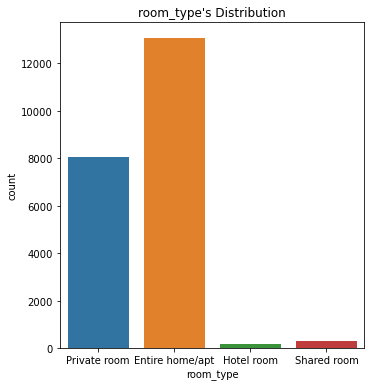

In [21]:
data = june.copy()
cat_dist_plot(cats)

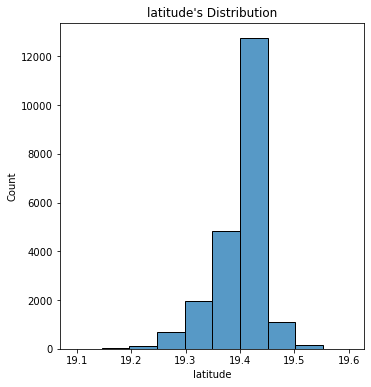

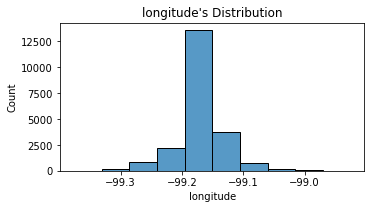

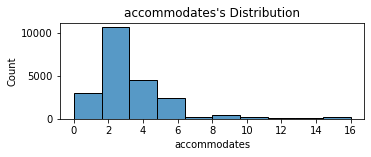

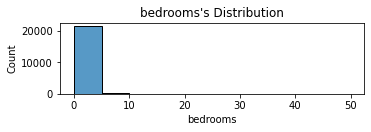

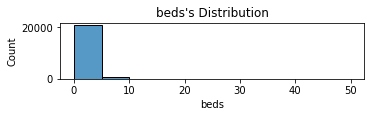

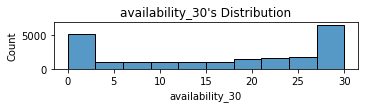

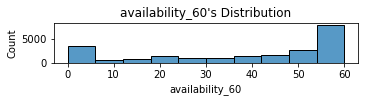

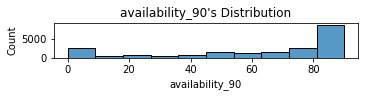

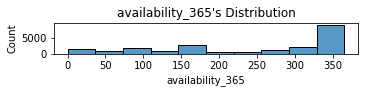

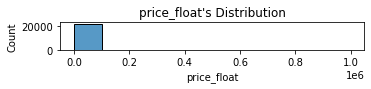

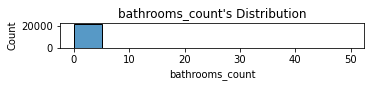

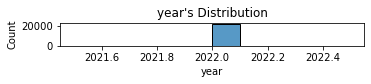

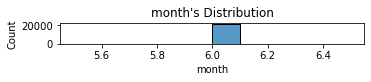

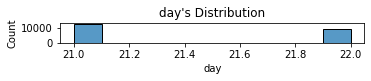

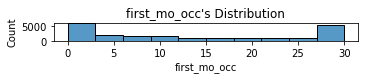

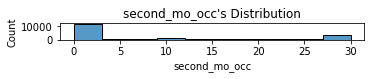

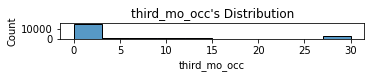

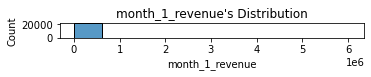

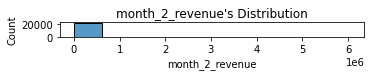

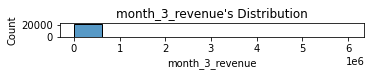

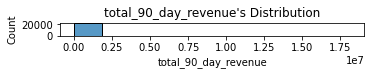

In [22]:
num_dist_plot(nums)

In [51]:
X = june[
    [
        "latitude",
        "longitude",
        "room_type",
        "accommodates",
        "bedrooms",
        "beds",
        "bathrooms_count",
    ]
]

X.duplicated().sum()

605

In [52]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
import numpy as np
from sklearn.cluster import KMeans

ct = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(), make_column_selector(dtype_include=object)),
)

In [53]:
X_Sc = ct.fit_transform(X)

In [54]:
kmeans = KMeans(n_clusters=12, random_state=1331).fit(X_Sc)
kmeans.labels_

array([9, 9, 9, ..., 8, 8, 4], dtype=int32)

In [55]:
june['cluster'] = kmeans.labels_

In [56]:
june

,id,last_scraped,latitude,longitude,room_type,accommodates,bedrooms,beds,availability_30,availability_60,...,month,day,first_mo_occ,second_mo_occ,third_mo_occ,month_1_revenue,month_2_revenue,month_3_revenue,total_90_day_revenue,cluster
0,52390579,2022-06-21,19.395126,-99.277374,Private room,1,3.0,1.0,30,60,...,6,21,0,0,0,0.0,0.0,0.0,0.0,9
1,35797,2022-06-21,19.382830,-99.271780,Entire home/apt,2,1.0,1.0,28,58,...,6,21,2,0,0,8112.0,0.0,0.0,8112.0,9
2,15511977,2022-06-21,19.410950,-99.244180,Private room,2,1.0,1.0,29,59,...,6,21,1,0,0,800.0,0.0,0.0,800.0,9
3,44616,2022-06-22,19.411620,-99.177940,Entire home/apt,14,5.0,8.0,26,53,...,6,22,4,3,0,72000.0,54000.0,0.0,126000.0,7
4,34776449,2022-06-21,19.426410,-99.225910,Private room,3,1.0,2.0,23,46,...,6,21,7,7,2,12453.0,12453.0,3558.0,28464.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,618034488468131637,2022-06-21,19.499980,-99.226010,Entire home/apt,4,1.0,2.0,20,50,...,6,21,10,0,0,6730.0,0.0,0.0,6730.0,8
21665,22107097,2022-06-21,19.507870,-99.220670,Entire home/apt,3,1.0,2.0,0,9,...,6,21,30,21,0,26910.0,18837.0,0.0,45747.0,8
21666,40617809,2022-06-21,19.507530,-99.225060,Entire home/apt,1,1.0,1.0,0,0,...,6,21,30,30,30,6900.0,6900.0,6900.0,20700.0,8
21667,569519288654139909,2022-06-21,19.493360,-99.229090,Entire home/apt,1,1.0,1.0,19,49,...,6,21,11,0,0,7590.0,0.0,0.0,7590.0,8


In [58]:
june.groupby('cluster').mean()

,id,latitude,longitude,accommodates,bedrooms,beds,availability_30,availability_60,availability_90,availability_365,...,year,month,day,first_mo_occ,second_mo_occ,third_mo_occ,month_1_revenue,month_2_revenue,month_3_revenue,total_90_day_revenue
cluster,,,,,,,,,,,,,,,,,,,,,
0,9.171283e+16,19.421715,-99.168382,1.786313,1.005264,1.100994,18.376292,41.035095,65.349581,248.328914,...,2022.0,6.0,21.513160,11.623708,7.341197,5.685514,7219.272958,4409.241178,3479.587639,15108.101774
1,7.784146e+16,19.326720,-99.158834,4.639279,2.178357,2.967936,15.348697,35.289579,58.369739,242.446894,...,2022.0,6.0,21.041082,14.651303,10.059118,6.919840,15925.118236,10869.631263,7473.621242,34268.370741
2,1.176943e+17,19.423050,-99.170025,4.299291,1.982506,2.476123,13.395508,33.024586,55.480142,230.483924,...,2022.0,6.0,21.606619,16.604492,10.370922,7.544444,27905.043499,16728.847281,12291.382979,56925.273759
3,8.976398e+16,19.400336,-99.158269,11.978261,12.391304,16.391304,22.326087,47.195652,71.891304,304.500000,...,2022.0,6.0,21.434783,7.673913,5.130435,5.304348,104208.934783,73860.152174,72650.413043,250719.500000
4,1.232781e+17,19.418169,-99.175668,7.009702,2.921691,4.166320,13.599446,33.241857,56.421344,234.148995,...,2022.0,6.0,21.534304,16.400554,10.357588,6.820513,49023.386694,32850.092862,23179.817048,105053.296604
5,9.949671e+16,19.415365,-99.076487,2.909483,1.339440,1.711207,20.678879,44.827586,70.032328,247.075431,...,2022.0,6.0,21.028017,9.321121,5.851293,4.795259,5868.134698,3871.627155,2454.573276,12194.335129
6,2.063012e+17,19.380663,-99.170137,11.333333,50.000000,50.000000,30.000000,60.000000,90.000000,365.000000,...,2022.0,6.0,21.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,8.373576e+16,19.384642,-99.165274,13.209125,4.619772,8.258555,17.266160,38.539924,62.794677,258.281369,...,2022.0,6.0,21.433460,12.733840,8.726236,5.745247,108156.809886,83877.292776,72739.627376,264773.730038
8,8.614955e+16,19.418978,-99.168745,2.475758,1.000206,1.293996,14.246544,35.031360,58.597483,239.103982,...,2022.0,6.0,21.624097,15.753456,9.215185,6.433877,19027.365587,10730.228595,7631.490819,37389.085001


<AxesSubplot:xlabel='cluster', ylabel='total_90_day_revenue'>

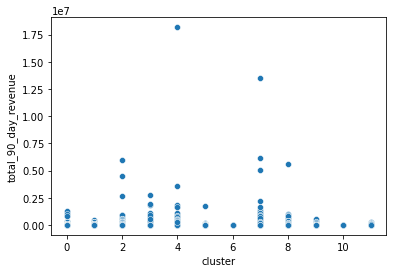

In [82]:
import seaborn as sns
sns.scatterplot(data=june, x='cluster', y='total_90_day_revenue')